In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally sized lists. Each participant will go through and record a time from each condition.


In [2]:
data = pd.read_csv("stroopdata.csv")
df = data.copy()

In [3]:
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Now that we have our data, we need to figure out how we can use statistical inference to draw a conclusion based on the results. To do this we need to know our independent and dependent variables. In this case, the independent variable is the congruent and incongruent words. The dependent variable is the time it takes to name the ink colors in equally sized lists.

   The next step in an experiment is to define a hypothesis as well as what statistical test we'd like to perform. A hypothesis test is a statistical test that is used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population.
   
   A hypothesis test examines two opposing hypothesis about a population: the null hypothesis and the alternative hypothesis. The null hypothesis is the statement being tested. Usually the null hypothesis is a statement of "no effect" or "no difference". The alternative hypothesis is the statement you want to be able to conclude is true.

   In this case, the null hypothesis is that the sample means of the congruent and incongruent populations will not be significantly different (95%). The mathematical notation is for this is, Ho: μC = μL, where μC is the congruent population mean and μL is the incongruent population mean. The alternative hypothesis is that the sample means of the congruent population will be less than that of the incongruent populations. The notation for this is H1: μC < μL.
   
   Since the alternative hypothesis is referring to a directional of the mean, I’ll use a paired t-test. Specifically, a one-tailed test. One tailed test seemed to be appropriate because of the small sample size (less than 30) and because both of the samples seem to be slightly skewed for looking at the histograms:

In [4]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


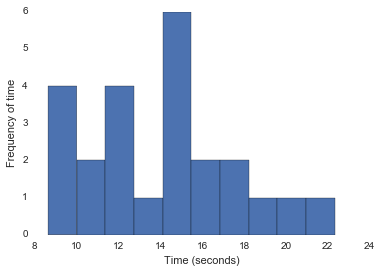

In [5]:
hist_congruent = df.Congruent.hist()
hist_congruent.set_ylabel("Frequency of time")
hist_congruent.set_xlabel("Time (seconds)")

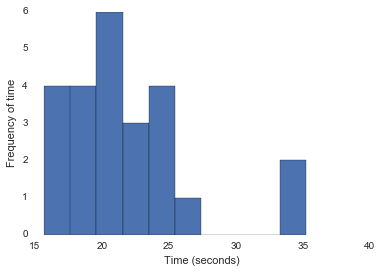

In [6]:
hist_incongruent = df.Incongruent.hist()
hist_incongruent.set_ylabel("Frequency of time")
hist_incongruent.set_xlabel("Time (seconds)")

Before we get into the statistical analysis, let's take a look at a few descriptive statistics including looking at a measure of central tendancy and of variability.

In [7]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [8]:
df.Congruent.describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [9]:
df.Incongruent.describe()

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

For central tendency, we can see that the mean time for the congruent list is 14.05 seconds while the avg time for the incongruent list is 22.01 seconds while the median time for the congruent list is 14.35 seconds while the median time for the incongruent list is 21.01 seconds.

For variability, the range for the congruent words is between 8.63 and 22.38 seconds and between 15.68 and 35.25 seconds for the incongruent words. Another common measure of variability is called the interquartile range (IQR), which is based on dividing a data set into quartiles. Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by the 25%, 50%, and 75%, respectively. The IQR is the difference between the first quartile and third quartile. For this dataset, the IQR for the congruent words is 4.31 seconds and 5.34 seconds for the incongruent words.

Next, let's take a look at the distribution of the sample data. Typically a boxplot is good way to do this as they are helpful for showing the shape, variability, and center (or median) of a data set in one nice graph.

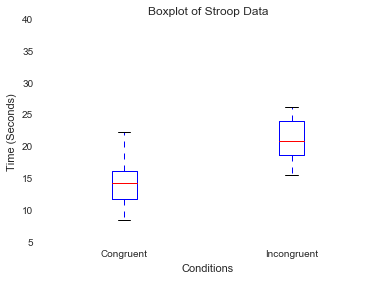

In [10]:
plot = df.plot(kind="box",title="Boxplot of Stroop Data")
plot.set_ylabel("Time (Seconds)")
plot.set_xlabel("Conditions")

The incongruent data is slightly skewed because the median (21.01 seconds) is lower than the mean (22.01 seconds). It’s also more variable than the congruent set due to the IQR being slightly higher.

Finally, we can perform our paired t-test using the scipy package. A paired t-test is used when we have two sets of repeated measures i.e. we have measured some parameter on the same subjects at different times (or under different conditions). 

In [11]:
paired_sample = stats.ttest_rel(df.Congruent, df.Incongruent)
print "The t-statistic is %.3f and the p-value is %.3f." % paired_sample

The t-statistic is -8.021 and the p-value is 0.000.


Because of the result I will reject the null hypothesis. I believe the incongruent words make it harder for the participants to say the color of the word rather than the word itself. The results matched these expectations